### Load required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics

## LLY21 example

In [2]:
data21 = pd.read_csv('./alldata/21/GECExport_LLY_2018_01_01_TO_2019_12_30.csv')
data21['ts'] = pd.to_datetime(data21['ts']) # change the object type to date type. 
data21 = data21.set_index('ts')
data21.head()

,instanceID,instanceIDGEC,Wind_speed,Energy_Export,Power,Ambient_temperature,High_speed_bearing_temperature,Rotor_speed,Nacelle_position,Generator_RPM,Gear_oil_temperature,Generator_temperature
ts,,,,,,,,,,,,
2018-01-01 00:00:00,LLY_WTG21,446,11.9,0.0,0.0,20.0,32.0,0.0,172.0,0.0,33.0,32.0
2018-01-01 00:10:00,LLY_WTG21,446,12.4,0.0,0.0,19.0,32.0,0.0,172.0,0.0,33.0,32.0
2018-01-01 00:20:00,LLY_WTG21,446,12.4,0.0,0.0,19.0,31.0,0.0,172.0,0.0,33.0,32.0
2018-01-01 00:30:00,LLY_WTG21,446,12.5,0.0,0.0,19.0,31.0,0.0,172.0,0.0,32.0,31.0
2018-01-01 00:40:00,LLY_WTG21,446,11.8,0.0,0.0,19.0,30.0,0.0,172.0,0.0,32.0,31.0


In [3]:
hour_21 = data21.resample('h').mean()
hour_21.drop('instanceIDGEC', axis = 1, inplace = True)

In [4]:
day_21 = data21.resample('d').mean()
day_21.drop('instanceIDGEC', axis = 1, inplace = True)

### Data Visualization

Evolution of selected variables.

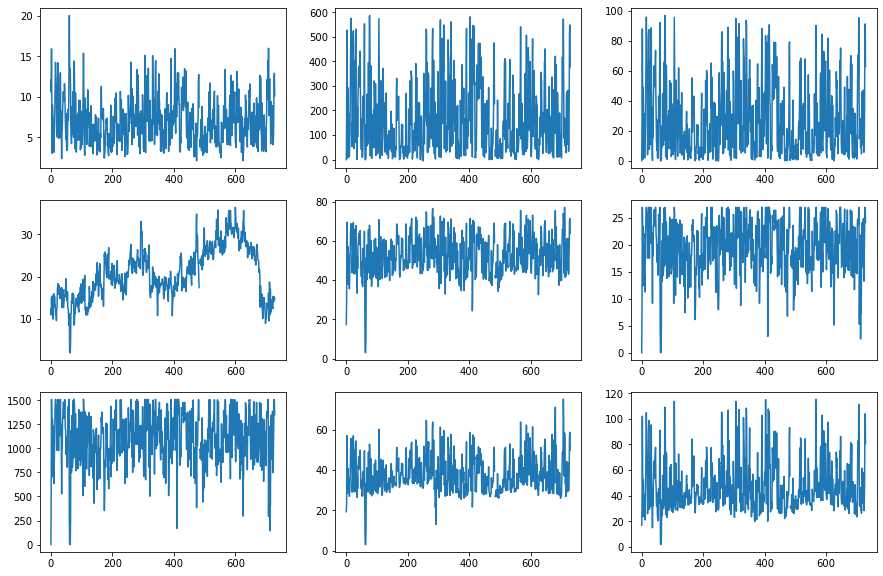

In [5]:
fig = plt.figure(num=1, figsize=(15,10))

Wind_speed = day_21["Wind_speed"].values
ax1 = fig.add_subplot(331)
ax1.plot(Wind_speed)

Power = day_21["Power"].values
ax2 = fig.add_subplot(332)
ax2.plot(Power)

Energy_Export = day_21["Energy_Export"].values
ax3 = fig.add_subplot(333)
ax3.plot(Energy_Export)

Ambient_temperature = day_21["Ambient_temperature"].values
ax4 = fig.add_subplot(334)
ax4.plot(Ambient_temperature)

High_speed_bearing_temperature = day_21["High_speed_bearing_temperature"].values
ax5 = fig.add_subplot(335)
ax5.plot(High_speed_bearing_temperature)

Rotor_speed = day_21["Rotor_speed"].values
ax6 = fig.add_subplot(336)
ax6.plot(Rotor_speed)

Generator_RPM = day_21["Generator_RPM"].values
ax7 = fig.add_subplot(337)
ax7.plot(Generator_RPM)

Gear_oil_temperature = day_21["Gear_oil_temperature"].values
ax8 = fig.add_subplot(338)
ax8.plot(Gear_oil_temperature)

Generator_temperature = day_21["Generator_temperature"].values
ax9 = fig.add_subplot(339)
ax9.plot(Generator_temperature)

plt.show()

### Correlation matrix

C:\Users\hc1119\Anaconda3\envs\pytorch1.5\lib\site-packages\ipykernel_launcher.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


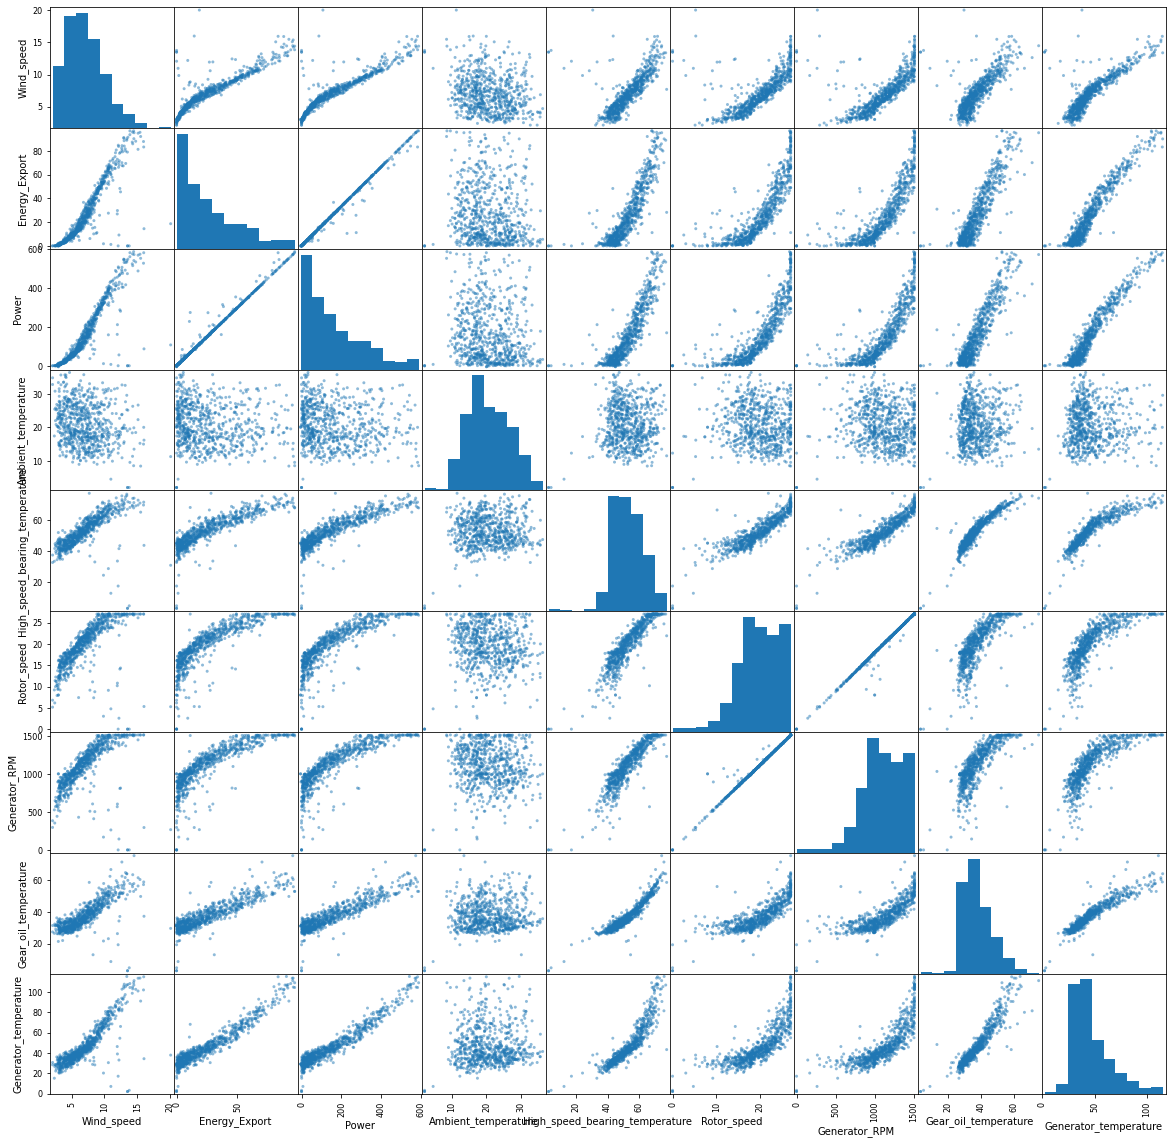

In [6]:
from pandas.plotting import scatter_matrix
day21_temp = day_21.drop('Nacelle_position', axis = 1, inplace = False)

fig = plt.figure(num=1, figsize = (20, 20))
ax = fig.add_subplot(111)
scatter_matrix(day21_temp, ax = ax)
plt.show()

### Drop useless variables
Energy_Export —— Power

Generator_RPM —— Rotor_speed

In [7]:
data21.drop('instanceIDGEC', axis = 1, inplace = True)
data21.drop('Energy_Export', axis = 1, inplace = True)
data21.drop('Rotor_speed', axis = 1, inplace = True)

In [8]:
data21.head()

,instanceID,Wind_speed,Power,Ambient_temperature,High_speed_bearing_temperature,Nacelle_position,Generator_RPM,Gear_oil_temperature,Generator_temperature
ts,,,,,,,,,
2018-01-01 00:00:00,LLY_WTG21,11.9,0.0,20.0,32.0,172.0,0.0,33.0,32.0
2018-01-01 00:10:00,LLY_WTG21,12.4,0.0,19.0,32.0,172.0,0.0,33.0,32.0
2018-01-01 00:20:00,LLY_WTG21,12.4,0.0,19.0,31.0,172.0,0.0,33.0,32.0
2018-01-01 00:30:00,LLY_WTG21,12.5,0.0,19.0,31.0,172.0,0.0,32.0,31.0
2018-01-01 00:40:00,LLY_WTG21,11.8,0.0,19.0,30.0,172.0,0.0,32.0,31.0


#### Remove missing data

In [9]:
data21 = data21.dropna()

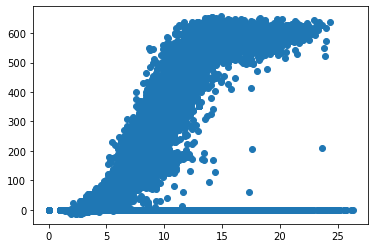

In [10]:
Power = data21["Power"].values
wind = data21["Wind_speed"].values

plt.scatter(wind, Power)

### Remove low output power values

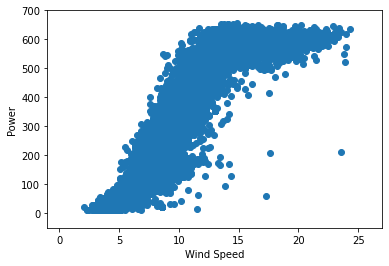

In [11]:
rest_data21 = data21[~(data21['Power'] < 10)]

rest_Power = rest_data21["Power"].values
rest_wind = rest_data21["Wind_speed"].values

fig = plt.figure(num=1, figsize=(6,4))
ax1 = fig.add_subplot(111)
ax1.scatter(rest_wind, rest_Power)
ax1.set_xlim(-1, 27)
ax1.set_ylim(-50, 700)
ax1.set_xlabel('Wind Speed')
ax1.set_ylabel('Power')

plt.show()

In [12]:
features_considered0 = ['Wind_speed', 'Power', 'Ambient_temperature', 'High_speed_bearing_temperature',
                       'Generator_RPM','Gear_oil_temperature', 'Generator_temperature']
features0 = rest_data21[features_considered0]
dataset0 = features0.to_numpy()

data_mean = dataset0.mean(axis = 0)
data_std = dataset0.std(axis = 0)
dataset0 = (dataset0 - data_mean)/data_std

print(dataset0.shape)

(79969, 7)


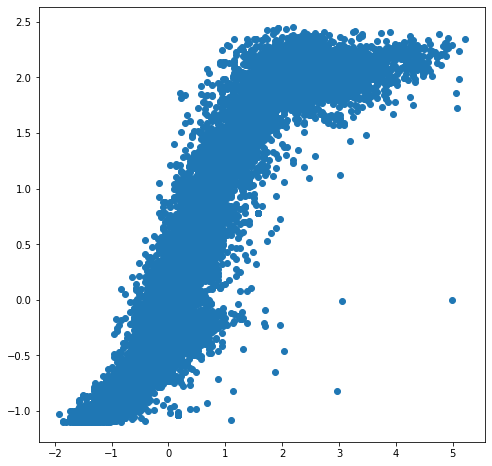

In [13]:
fig = plt.figure(num=1, figsize = (8, 8))
ax = fig.add_subplot(111)
plt.scatter(dataset0[:, 0], dataset0[:, 1])
plt.show()

In [14]:
rest_data21.loc[:, 'Wind_speed'] = dataset0[:, 0]
rest_data21.loc[:, 'Power'] = dataset0[:, 1]
rest_data21.loc[:, 'Ambient_temperature'] = dataset0[:, 2]
rest_data21.loc[:, 'High_speed_bearing_temperature'] = dataset0[:, 3]
rest_data21.loc[:, 'Generator_RPM'] = dataset0[:, 4]
rest_data21.loc[:, 'Gear_oil_temperature'] = dataset0[:, 5]
rest_data21.loc[:, 'Generator_temperature'] = dataset0[:, 6]

C:\Users\hc1119\Anaconda3\envs\pytorch1.5\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Variables selection

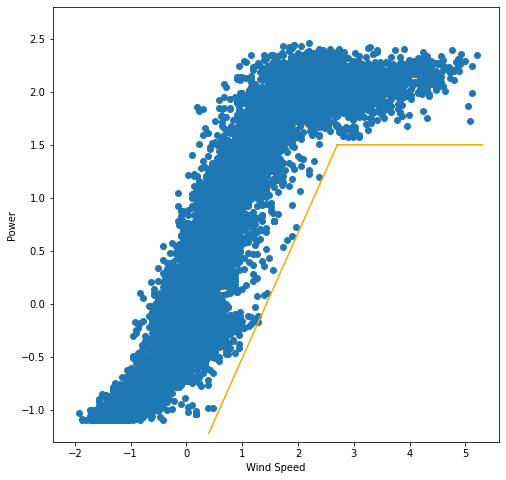

In [16]:
rest_data = rest_data21[~((1.18 * rest_data21['Wind_speed'] - 1.69 - rest_data21['Power'] > 0)
                            & (rest_data21['Wind_speed'] > 0.4) & (rest_data21['Wind_speed'] <= 2.7))]

rest_data = rest_data[~((rest_data['Power'] < 1.5) & (rest_data['Wind_speed'] >= 2.7)
                          & (rest_data['Wind_speed'] < 5.5))]


rest_Power = rest_data["Power"].values
rest_wind = rest_data["Wind_speed"].values

fig = plt.figure(num=1, figsize=(8,8))
ax1 = fig.add_subplot(111)
ax1.scatter(rest_wind, rest_Power)
ax1.set_xlim(-2.4, 5.6)
ax1.set_ylim(-1.3, 2.8)
ax1.set_xlabel('Wind Speed')
ax1.set_ylabel('Power')

x = np.linspace(0.4, 2.7, 100)
y = 1.18*x - 1.69
ax1.plot(x, y, c='orange')

xx = np.linspace(2.7, 5.3, 100)
yy = 0.0001*xx + 1.5
ax1.plot(xx, yy, c='orange')

plt.show()

In [17]:
features_considered = ['Wind_speed', 'Power', 'Ambient_temperature', 'High_speed_bearing_temperature',
                       'Generator_RPM','Gear_oil_temperature', 'Generator_temperature']
features = rest_data[features_considered]

col_name = features.columns.tolist()
col_name.insert(0,'Labels') # Add  labels
features = features.reindex(columns = col_name)

features['Labels'] = 0

features.head()

,Labels,Wind_speed,Power,Ambient_temperature,High_speed_bearing_temperature,Generator_RPM,Gear_oil_temperature,Generator_temperature
ts,,,,,,,,
2018-01-02 15:40:00,0,-0.159715,-0.098970,-1.488162,-4.426560,1.059909,-2.818585,-1.851844
2018-01-02 15:50:00,0,0.226229,0.307549,-1.326835,-1.863856,1.047934,-1.699551,-1.346954
2018-01-02 16:00:00,0,0.387039,0.527289,-1.165508,0.224272,1.047934,-0.673770,-0.799989
2018-01-02 16:10:00,0,0.547849,0.609692,-1.004181,0.319187,1.055917,-0.487265,-0.673766
2018-01-02 16:20:00,0,0.547849,0.653640,-0.842855,0.319187,1.063900,-0.394012,-0.547544


In [18]:
features['1/4/2019':'20/4/2019']['Labels'] = 1

C:\Users\hc1119\Anaconda3\envs\pytorch1.5\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### data with label 0

In [19]:
features_considered1 = ['Wind_speed', 'Power', 'Ambient_temperature', 'High_speed_bearing_temperature','Gear_oil_temperature']
features1 = features[features_considered1]
features1 = features1['2018-01':'2018-12']

dataset1 = features1.to_numpy()

print(dataset1.shape)

(40331, 5)


In [20]:
features_considered2 = ['Labels']
features2 = features[features_considered2]
features2 = features2['2018-01':'2018-12']
dataset2 = features2.to_numpy()
print(dataset2.shape)

(40331, 1)


### data with label 1

In [21]:
features_considered4 = ['Wind_speed', 'Power', 'Ambient_temperature', 'High_speed_bearing_temperature','Gear_oil_temperature']
features4 = features[features_considered4]
features4 = features4['2019-4-1':'2019-4-10']

dataset4 = features4.to_numpy()

print(dataset4.shape)

(1238, 5)


In [22]:
features_considered5 = ['Labels']
features5 = features[features_considered5]
features5 = features5['2019-4-1':'2019-4-10']
dataset5 = features5.to_numpy()
print(dataset6.shape)

(1238, 1)


In [23]:
dataset6 = np.hstack((dataset5,dataset4))
dataset6.shape

(1238, 6)

#### Combine two parts to form training set

In [24]:
dataset3 = np.hstack((dataset2,dataset1))
dataset3.shape

(40331, 6)

In [25]:
datasetall = np.vstack((dataset3,dataset6))
datasetall.shape

(41569, 6)

### Model development

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

from livelossplot import PlotLosses
from pycm import *

from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit

In [28]:
device = 'cpu'
if torch.cuda.device_count() > 0 and torch.cuda.is_available():
    print("Cuda installed! Running on GPU!")
    device = 'cuda'
else:
    print("No GPU available!")

Cuda installed! Running on GPU!


In [29]:
class SLNN(nn.Module):
  def __init__(self, I, H1, H2, O):
    super(SLNN, self).__init__()
    
    self.hidden_1 = nn.Linear(I, H1, bias=True)
    self.hidden_2 = nn.Linear(H1, H2, bias=True)
    self.output = nn.Linear(H2, O, bias=True)
    self.activation = nn.ReLU()
    
  def forward(self, x):
    z1 = self.hidden_1(x)
    a1 = self.activation(z1)
    z2 = self.hidden_2(a1)
    a2 = self.activation(z2)
    return self.output(a2)

testx = torch.randn((2, 4))
print(testx)
model = SLNN(4, 10, 5, 2)
testy = model(testx)
print(testy)

tensor([[-2.0057, -1.6382,  0.8563,  0.0356],
        [-0.2444, -0.5774, -1.3406, -0.7677]])
tensor([[0.0969, 0.3690],
        [0.0701, 0.3429]], grad_fn=<AddmmBackward>)


### Train the model

In [30]:
allx = datasetall[:, 1:]
ally = datasetall[:, 0]
print(allx.shape, ally.shape)

(41569, 5) (41569,)


In [31]:
shuffler = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in shuffler.split(allx, ally):
    X_train0, X_test = allx[train_index], allx[test_index]
    y_train0, y_test = ally[train_index], ally[test_index]
print(X_train0.shape, X_test.shape)
print(y_train0.shape, y_test.shape)

(33255, 5) (8314, 5)
(33255,) (8314,)


In [32]:
shuffler2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, val_index in shuffler2.split(X_train0, y_train0):
    X_train, X_val = X_train0[train_index], X_train0[val_index]
    y_train, y_val = y_train0[train_index], y_train0[val_index]
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(26604, 5) (6651, 5)
(26604,) (6651,)


In [33]:
X_train = torch.from_numpy(X_train)
X_val = torch.from_numpy(X_val)
X_test = torch.from_numpy(X_test)
y_train = torch.from_numpy(y_train)
y_val = torch.from_numpy(y_val)
y_test = torch.from_numpy(y_test)

In [34]:
print(X_train.shape, X_test.shape)
print(X_val.shape, X_val.shape)
print(y_train.shape, y_test.shape)

torch.Size([26604, 5]) torch.Size([8314, 5])
torch.Size([6651, 5]) torch.Size([6651, 5])
torch.Size([26604]) torch.Size([8314])


In [36]:
target_train = TensorDataset(X_train, y_train.long())
target_validate = TensorDataset(X_val, y_val.long())
target_test = TensorDataset(X_test, y_test.long())

In [37]:
def train(model, optimizer, criterion, data_loader):
    model.train()
    train_loss, train_accuracy = 0, 0
    for X, y in data_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        a2 = model(X.float())
        loss = criterion(a2, y)
        loss.backward()
        train_loss += loss*X.size(0)
        y_pred = F.log_softmax(a2, dim=1).max(1)[1]
        train_accuracy += accuracy_score(y.cpu().numpy(), y_pred.detach().cpu().numpy())*X.size(0)
        optimizer.step()  
        
    return train_loss/len(data_loader.dataset), train_accuracy/len(data_loader.dataset)
  
def validate(model, criterion, data_loader):
    model.eval()
    validation_loss, validation_accuracy = 0., 0.
    for X, y in data_loader:
        with torch.no_grad():
            X, y = X.to(device), y.to(device)
            a2 = model(X.float())
            loss = criterion(a2, y)
            validation_loss += loss*X.size(0)
            y_pred = F.log_softmax(a2, dim=1).max(1)[1]
            validation_accuracy += accuracy_score(y.cpu().numpy(), y_pred.cpu().numpy())*X.size(0)
            
    return validation_loss/len(data_loader.dataset), validation_accuracy/len(data_loader.dataset)
  
def evaluate(model, data_loader):
    model.eval()
    ys, y_preds = [], []
    for X, y in data_loader:
        with torch.no_grad():
            X, y = X.to(device), y.to(device)
            a2 = model(X.float())
            y_pred = F.log_softmax(a2, dim=1).max(1)[1]
            ys.append(y.cpu().numpy())
            y_preds.append(y_pred.cpu().numpy())
            
    return np.concatenate(y_preds, 0),  np.concatenate(ys, 0)

### Adam + different learning rate

In [38]:
def train_model_adam(learningrate):
    model = SLNN(5, 100, 50, 2).to(device)
    optimizer = torch.optim.Adam(model.parameters(),lr=learningrate)
    criterion = nn.CrossEntropyLoss()

    train_loader = DataLoader(target_train, batch_size=32, shuffle=True, num_workers=0)
    validation_loader = DataLoader(target_validate, batch_size=32, shuffle=False, num_workers=0)
    test_loader = DataLoader(target_test, batch_size=32, shuffle=False, num_workers=0)

    liveloss = PlotLosses()
    for epoch in range(50):
      logs = {}
      train_loss, train_accuracy = train(model, optimizer, criterion, train_loader)

      logs['' + 'log loss'] = train_loss.item()
      logs['' + 'accuracy'] = train_accuracy.item()

      validation_loss, validation_accuracy = validate(model, criterion, validation_loader)
      logs['val_' + 'log loss'] = validation_loss.item()
      logs['val_' + 'accuracy'] = validation_accuracy.item()

      liveloss.update(logs)
      liveloss.draw()
    return True

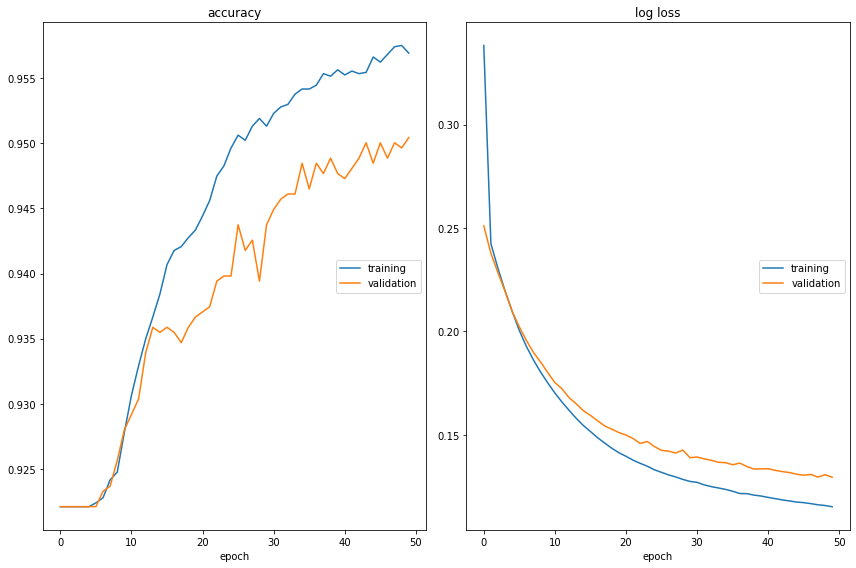

accuracy
	training         	 (min:    0.922, max:    0.958, cur:    0.957)
	validation       	 (min:    0.922, max:    0.950, cur:    0.950)
log loss
	training         	 (min:    0.115, max:    0.338, cur:    0.115)
	validation       	 (min:    0.129, max:    0.251, cur:    0.129)


True

In [39]:
train_model_adam(0.0001)

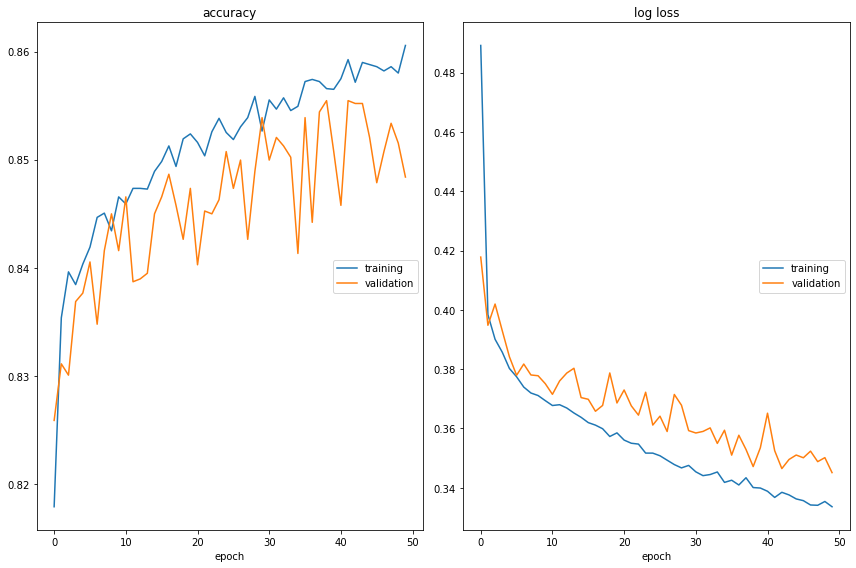

accuracy
	training         	 (min:    0.818, max:    0.861, cur:    0.861)
	validation       	 (min:    0.826, max:    0.855, cur:    0.848)
log loss
	training         	 (min:    0.334, max:    0.489, cur:    0.334)
	validation       	 (min:    0.345, max:    0.418, cur:    0.345)


True

In [59]:
train_model_adam(0.001)

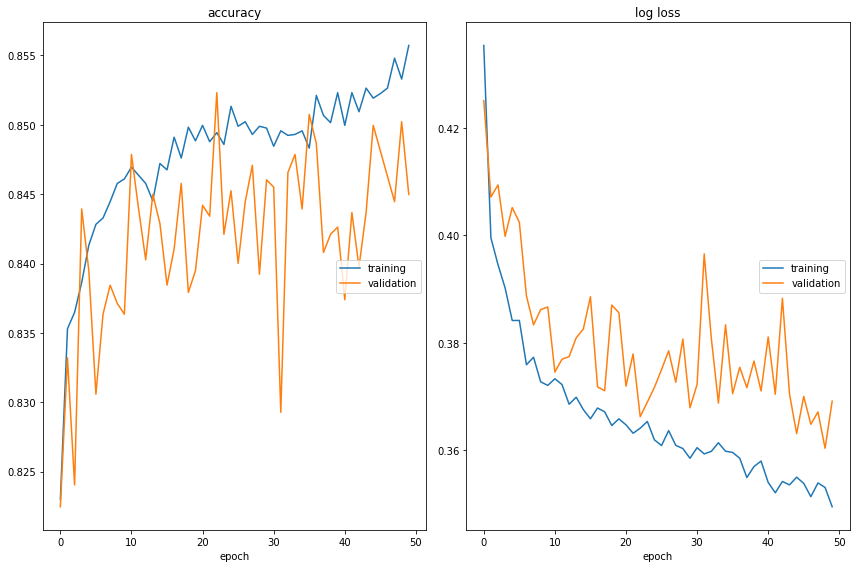

accuracy
	training         	 (min:    0.823, max:    0.856, cur:    0.856)
	validation       	 (min:    0.822, max:    0.852, cur:    0.845)
log loss
	training         	 (min:    0.349, max:    0.435, cur:    0.349)
	validation       	 (min:    0.360, max:    0.425, cur:    0.369)


True

In [60]:
train_model_adam(0.01)

### Adam + scheduler

In [40]:
def train_sch(model, optimizer, criterion, scheduler, data_loader):
    model.train()
    train_loss, train_accuracy = 0, 0
    for X, y in data_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        a2 = model(X.float())
        loss = criterion(a2, y)
        loss.backward()
        train_loss += loss*X.size(0)
        y_pred = F.log_softmax(a2, dim=1).max(1)[1]
        train_accuracy += accuracy_score(y.cpu().numpy(), y_pred.detach().cpu().numpy())*X.size(0)
        optimizer.step()
        
    return train_loss/len(data_loader.dataset), train_accuracy/len(data_loader.dataset)

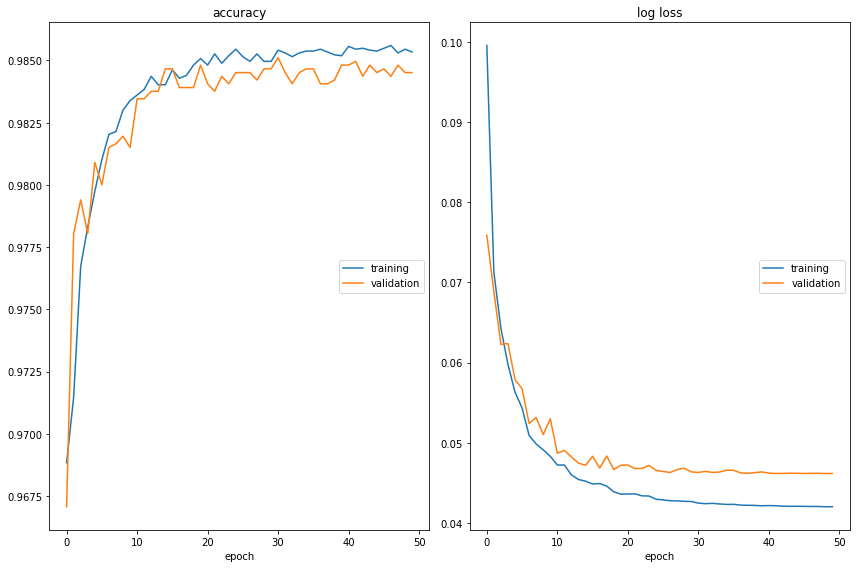

accuracy
	training         	 (min:    0.969, max:    0.986, cur:    0.985)
	validation       	 (min:    0.967, max:    0.985, cur:    0.985)
log loss
	training         	 (min:    0.042, max:    0.100, cur:    0.042)
	validation       	 (min:    0.046, max:    0.076, cur:    0.046)


In [41]:
model = SLNN(5, 100, 50, 2).to(device)
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
criterion = nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 6, gamma=0.5)

train_loader = DataLoader(target_train, batch_size=32, shuffle=True, num_workers=0)
validation_loader = DataLoader(target_validate, batch_size=32, shuffle=False, num_workers=0)
test_loader = DataLoader(target_test, batch_size=32, shuffle=False, num_workers=0)

liveloss = PlotLosses()
for epoch in range(50):
  logs = {}
  train_loss, train_accuracy = train_sch(model, optimizer, criterion, scheduler, train_loader)

  logs['' + 'log loss'] = train_loss.item()
  logs['' + 'accuracy'] = train_accuracy.item()
    
  scheduler.step()

  validation_loss, validation_accuracy = validate(model, criterion, validation_loader)
  logs['val_' + 'log loss'] = validation_loss.item()
  logs['val_' + 'accuracy'] = validation_accuracy.item()

  liveloss.update(logs)
  liveloss.draw()

#### Save the model

In [42]:
torch.save(model.state_dict(), './alldata/21/model21_binaryclassification.pt')

In [43]:
test_loader = DataLoader(target_test, batch_size=32, shuffle=False, num_workers=0)

test_loss, test_accuracy = validate(model, criterion, test_loader)    
print("Avg. Test Loss: %1.3f" % test_loss.item(), " Avg. Test Accuracy: %1.3f" % test_accuracy.item())
print("")

Avg. Test Loss: 0.044  Avg. Test Accuracy: 0.986



#### Load the model

In [44]:
model = SLNN(5, 100, 50, 2).to(device)
model.load_state_dict(torch.load('./alldata/21/model21_binaryclassification.pt'))
model.eval()

SLNN(
  (hidden_1): Linear(in_features=5, out_features=100, bias=True)
  (hidden_2): Linear(in_features=100, out_features=50, bias=True)
  (output): Linear(in_features=50, out_features=2, bias=True)
  (activation): ReLU()
)

### Make prediction

In [45]:
periods2018 = []
periods2019 = []
for i in range(12):
    timestring1 = '2018-' + str(i+1) + '-1'
    periods2018.append(timestring1)
    timestring2 = '2018-' + str(i+1) + '-15'
    periods2018.append(timestring2)
    timestring3 = '2019-' + str(i+1) + '-1'
    periods2019.append(timestring3)
    timestring4 = '2019-' + str(i+1) + '-15'
    periods2019.append(timestring4)
periods = periods2018 + periods2019

In [46]:
len(periods)

48

In [47]:
features_considered_target = ['Labels', 'Wind_speed', 'Power', 'Ambient_temperature', 'High_speed_bearing_temperature','Gear_oil_temperature']
features_target = features[features_considered_target]
scorelist = []    
for i, time in enumerate(periods):
    if ((i+1) > (len(periods)-1) or (i < 10)):
        continue
    features_target0 = features_target[periods[i]:periods[i+1]]
    dataset_target = features_target0.to_numpy()
    
    if dataset_target.shape[0] == 0:
        scorelist.append(0)
        continue
    
    allx_target = dataset_target[:, 1:]
    ally_target = dataset_target[:, 0]
    allx_target_test = torch.from_numpy(allx_target)
    ally_target_test = torch.from_numpy(ally_target)
    
    alltarget_test = TensorDataset(allx_target_test, ally_target_test.long())
    alltest_loader = DataLoader(alltarget_test, batch_size=32, shuffle=False, num_workers=0)
    
    test_loss, test_accuracy = validate(model, criterion, alltest_loader)    
    scorelist.append(test_accuracy.item())
    

In [48]:
len(scorelist)
x = np.arange(1, len(scorelist)+1)

In [49]:
timelabel = []
for i, time in enumerate(periods):
    if ((i+1) > (len(periods)-1) or (i < 10)):
        continue
    tempstring = periods[i] + ":" + periods[i+1]
    timelabel.append(tempstring)


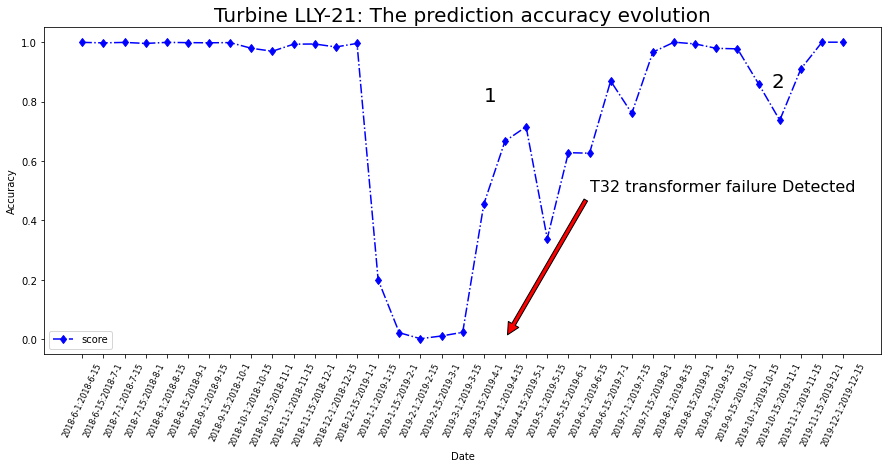

In [59]:
fig = plt.figure(num=1, figsize=(15,6))
ax1 = fig.add_subplot(111)
ax1.plot(x, scorelist, 'b-.d', label = 'score')
ax1.legend(loc="best")
ax1.set_title('Turbine LLY-21: The prediction accuracy evolution', fontsize = 20)
ax1.set_xticks(np.linspace(1, len(scorelist), len(scorelist)))
ax1.set_xticklabels(timelabel, fontsize=8, rotation=65)

ax1.annotate('T32 transformer failure Detected', xy=(21, 0), xytext=(25, 0.5),
            xycoords='data', fontsize = 16,
            arrowprops=dict(facecolor='red', shrink=0.03)
            )
ax1.text(20, 0.8, '1', fontsize=20)
ax1.text(33.6, 0.85, '2', fontsize=20)

ax1.set_xlabel('Date')
ax1.set_ylabel('Accuracy')


plt.show()